In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data1.csv to data1.csv


In [4]:
df1 = pd.read_csv('data1.csv')
df1.dataframeName = 'data1.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2148 rows and 15 columns


In [5]:
df1.head()

,product_id,product_name,product_company,product_flavour,category,product_size,product_price,product_rate,one_star,two_star,three_star,four_star,five_star,reviews_number,product_quality
0,88411,"Matcha Road, Matcha + Collagen, Grass-Fed Coll...",Matcha Road,"Matcha + Collagen, Grass-Fed Collagen Peptides,",Tea,224 g,39.21,4.5,4,2,2,7,56,71,excellent
1,96659,"California Gold Nutrition, Superfoods, Matcha ...",California Gold Nutrition,"Superfoods, Matcha Green Tea Powder,",Tea,114 g,26.96,3.8,5,1,4,10,14,34,good
2,96973,"Matcha Road, Matcha + Vitamin C, Trial Pack (C...",Matcha Road,"Matcha + Vitamin C, Trial Pack (Citrus Ginger...",Tea,5 g,8.99,2.9,8,3,1,3,7,22,good
3,41988,"Yogi Tea, Organic, Honey Lavender Stress Relie...",Yogi Tea,"Organic, Honey Lavender Stress Relief, Caffei...",Tea,29 g,6.5,4.5,33,39,78,175,731,1056,excellent
4,69658,"MRM, Matcha Green Tea Powder, 6 oz (170 g)",MRM,"Matcha Green Tea Powder,",Tea,170 g,24.49,4.4,60,31,65,108,632,897,excellent


In [6]:
df1.describe()

,product_id,product_rate,one_star,two_star,three_star,four_star,five_star,reviews_number
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,56267.761639,4.301955,8.544693,6.222998,15.057263,32.040968,139.713687,201.459032
std,27357.524687,0.489942,18.209728,13.465791,34.485533,76.561705,410.075319,535.410140
min,374.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32399.750000,4.200000,1.000000,0.000000,1.000000,3.000000,13.000000,20.000000
50%,58657.000000,4.400000,3.000000,2.000000,5.000000,10.000000,39.000000,61.000000
75%,81953.250000,4.600000,8.000000,6.000000,14.000000,28.000000,106.000000,161.250000
max,99554.000000,5.000000,267.000000,184.000000,643.000000,1349.000000,6936.000000,8585.000000


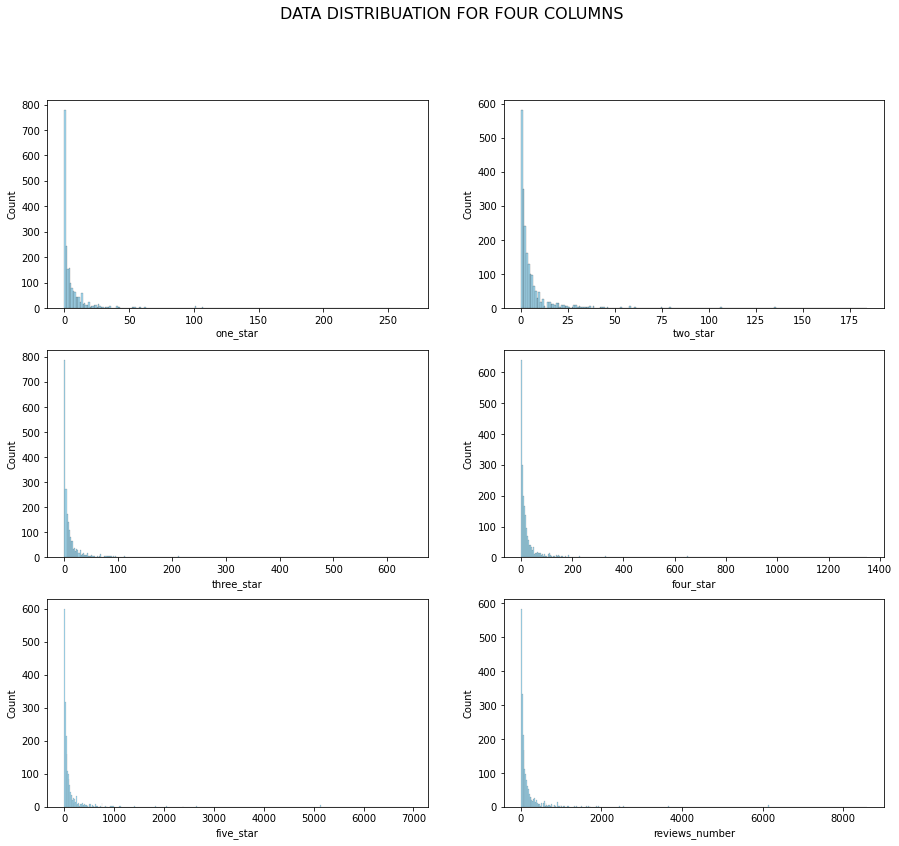

In [7]:
list_columns=list(df1.iloc[:,[8,9,10,11,12,13]])

fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15,13)) 
ax = ax.ravel() 
for i, column in enumerate(list_columns): 
    sns.histplot(df1[column].dropna(),color='skyblue',ax=ax[i])

fig.suptitle('DATA DISTRIBUATION FOR FOUR COLUMNS\n ', fontsize=16);

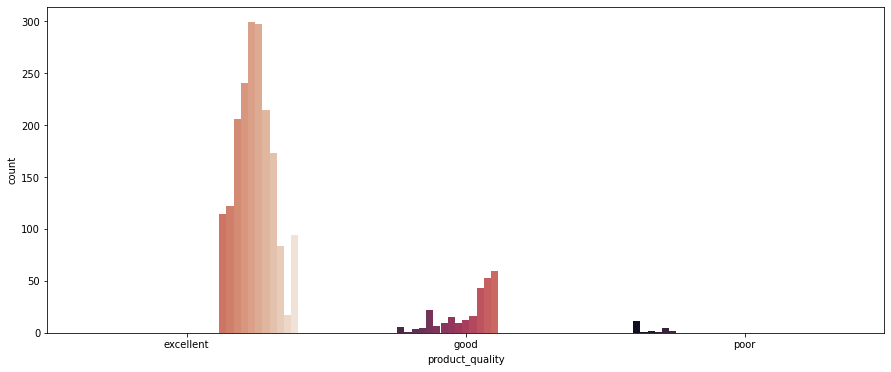

In [8]:
fig, ax = plt.subplots(nrows=1,figsize=(15,6)) 

x=sns.countplot(x="product_quality", hue="product_rate", data=df1,palette="rocket",saturation=0.6);
x.legend_.remove()

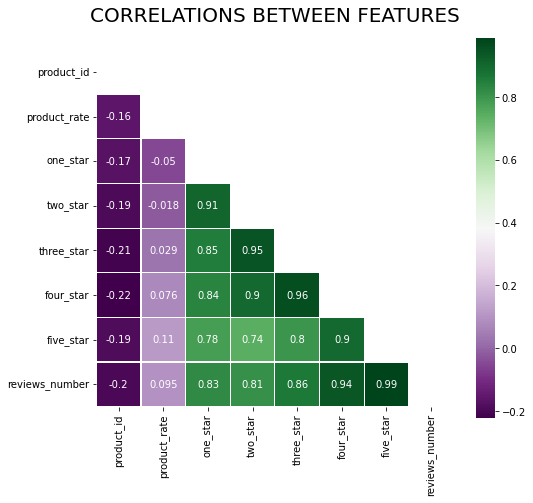

In [9]:
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (8,7))
sns.heatmap(df1.corr(), annot=True,mask = mask, cmap ='PRGn',linewidths=0.1,square=True)
plt.title("CORRELATIONS BETWEEN FEATURES\n", y = 1.03,fontsize = 20);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5d05ff250>],
      dtype=object)

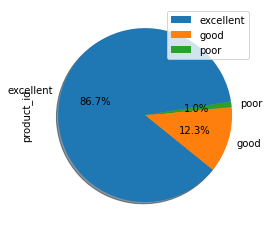

In [10]:
colors = ['yellowgreen', 'lightskyblue','gold']
#explode = (0,0,0,0,0,0,0.05)

# groupbed the data based on the gender and the class of the passenger
gender_class=df1.groupby('product_quality').agg('count')
gender_class
#plot the pie to display the percentage all the passengers [female,male] in all the classes
gender_class.iloc[0:3,[0]].plot.pie(subplots=True, autopct='%1.1f%%',
    shadow=True,legend=True, startangle=9)